In [94]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [95]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'model_input_table'
]

In [96]:
catalog.load("model_input_table")

[10/23/25 03:02:18] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=997747;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=74813;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,Alto,0,0,0,179,69.000000,107500000.0,250000.0,206900000.0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,Alto,0,0,0,189,82.000000,93000000.0,140000.0,160400000.0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,Alto,0,0,0,182,83.000000,44500000.0,135000.0,91200000.0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,Medio,0,0,0,172,69.000000,37000000.0,45000.0,77700000.0,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,Alto,0,0,0,177,75.000000,108000000.0,160000.0,186300000.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,Bajo,0,0,0,185,64.863656,50000.0,5000.0,113000.0,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,Bajo,0,0,0,190,81.192968,35000.0,5000.0,58000.0,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,Bajo,0,0,0,183,79.832192,35000.0,1000.0,66000.0,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,Bajo,0,0,0,190,78.925008,60000.0,5000.0,146000.0,2020


In [97]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=470012;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=687579;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento 
from sklearn.model_selection import train_test_split

#Modelo de regresion lineal y regresion lineal multiple
from sklearn.linear_model import LinearRegression


## **Modelo de Regresion Multiple**

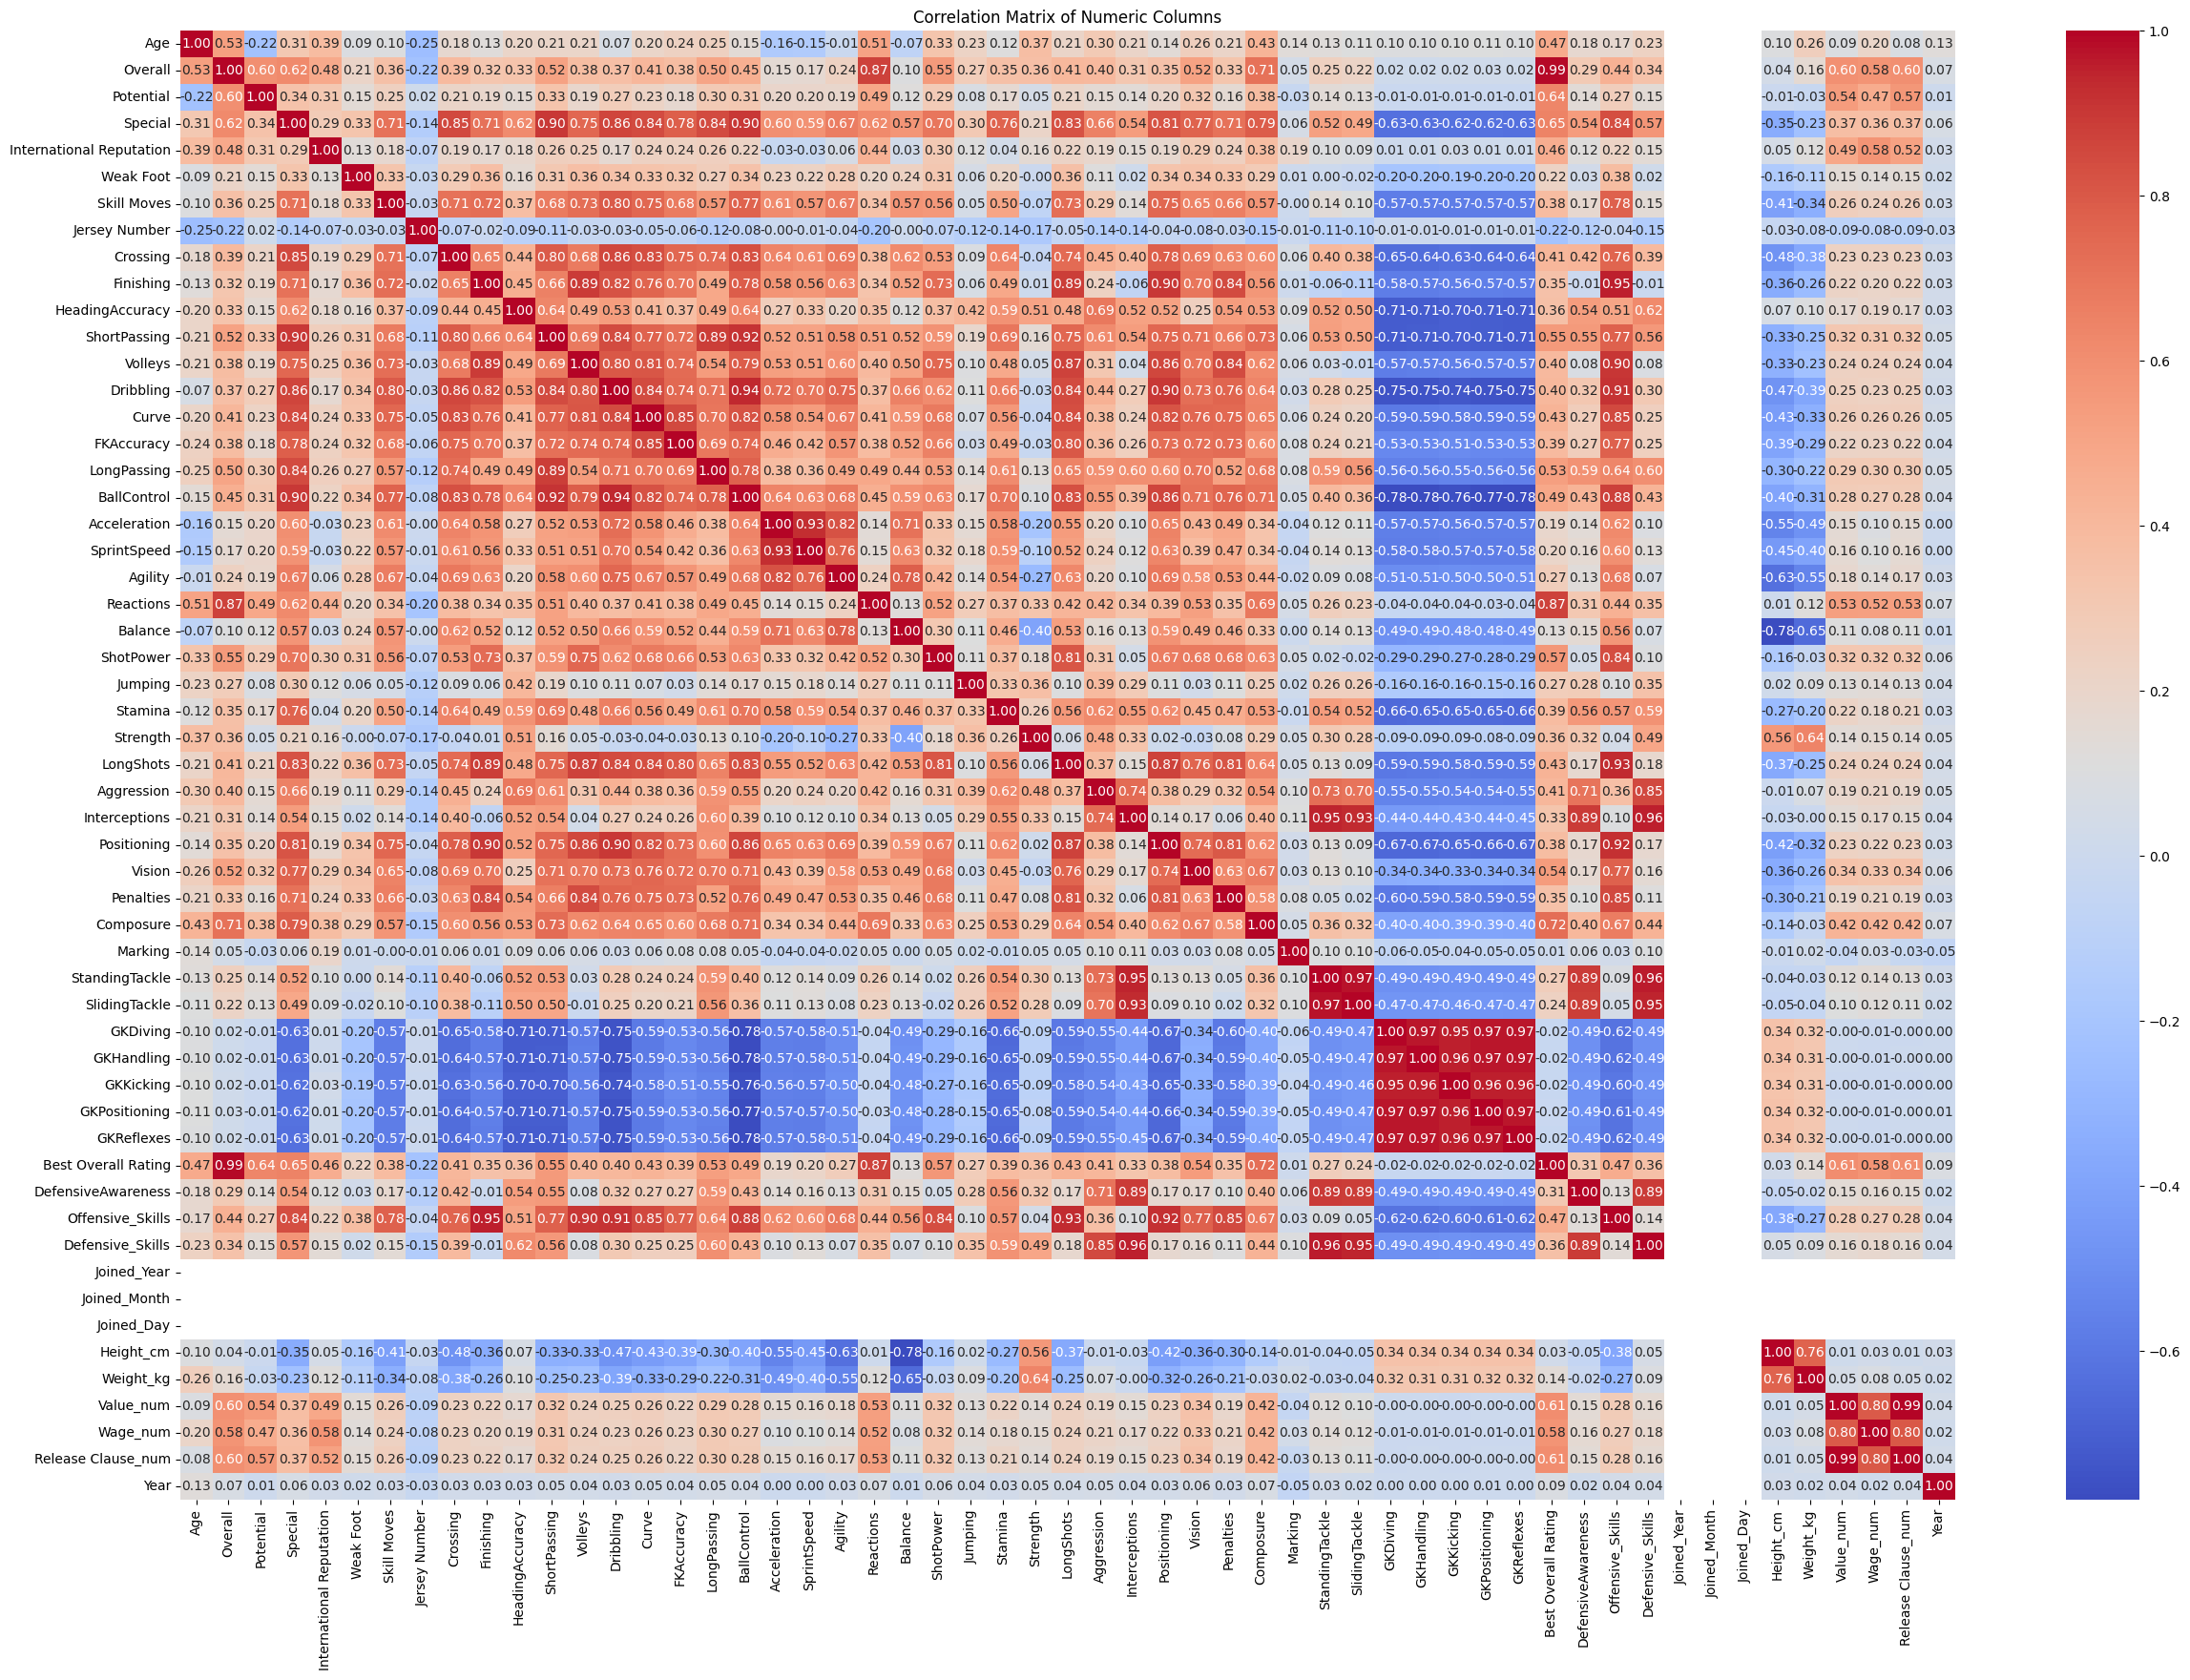

In [99]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

#### **Selección de caracteristicas**

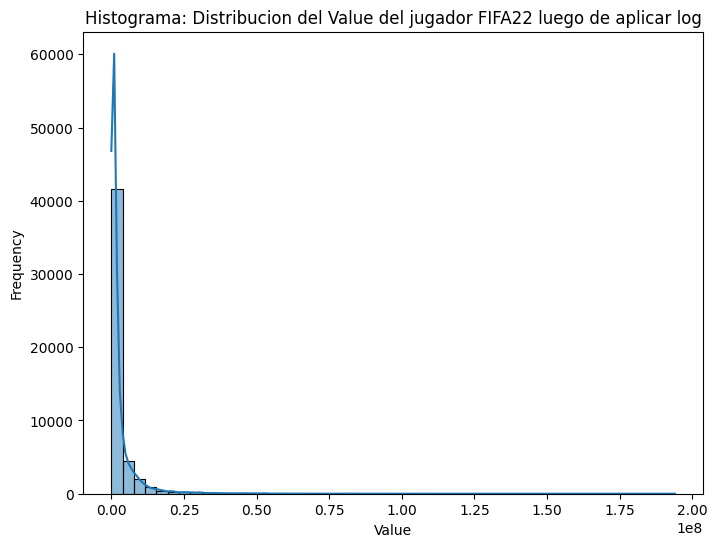

In [100]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(df_FIFA['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA22 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [101]:
x = df_FIFA[["Overall"]]
y = df_FIFA['Value_num']

#### **División de los datos en entrenamiento y prueba**


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

#### **Creación del modelo y ajuste (fit)**

Creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas Y.

In [103]:
#model = LinearRegression()
#model.fit(X_train, y_test)
#Y_hat = model.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)   # Entrena con los datos de entrenamiento
Y_hat = model.predict(X_test) # Predice con los datos de prueba


### **Métricas de evaluación**

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)

# Métricas de evaluación
mse = mean_squared_error(y_test, Y_hat)
mae = mean_absolute_error(y_test, Y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_hat)

# Mostrar resultados
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² (Variance score): {r2:.2f}")

Mean Squared Error (MSE): 23346708571345.145
Mean Absolute Error (MAE): 2578965.441297669
Root Mean Squared Error (RMSE): 4831843.185715483
R² (Variance score): 0.37


#Ejemplo aplicando log1p

In [105]:
#df_FIFA['Value_num'] = np.log1p(df_FIFA['Value_num'])  # log(1 + x)
df_FIFA['Value_num'] = np.log(df_FIFA['Value_num'])  # log(1 + x)

x = df_FIFA[["Overall"]]
y = df_FIFA['Value_num']

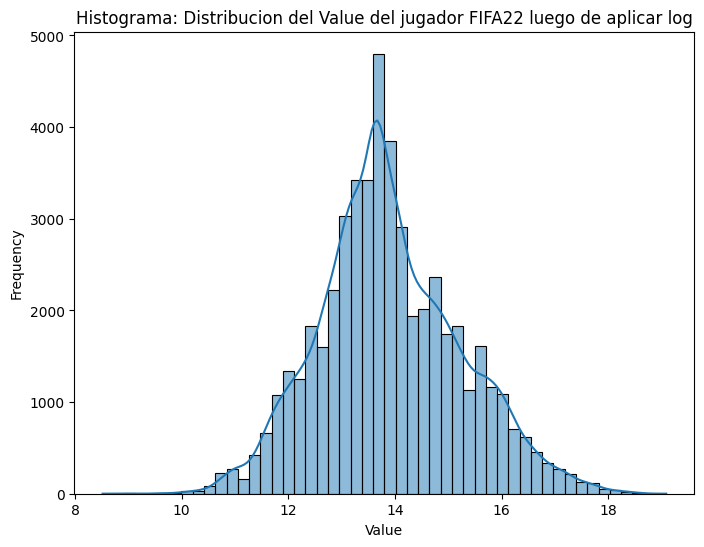

In [106]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(df_FIFA['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA22 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

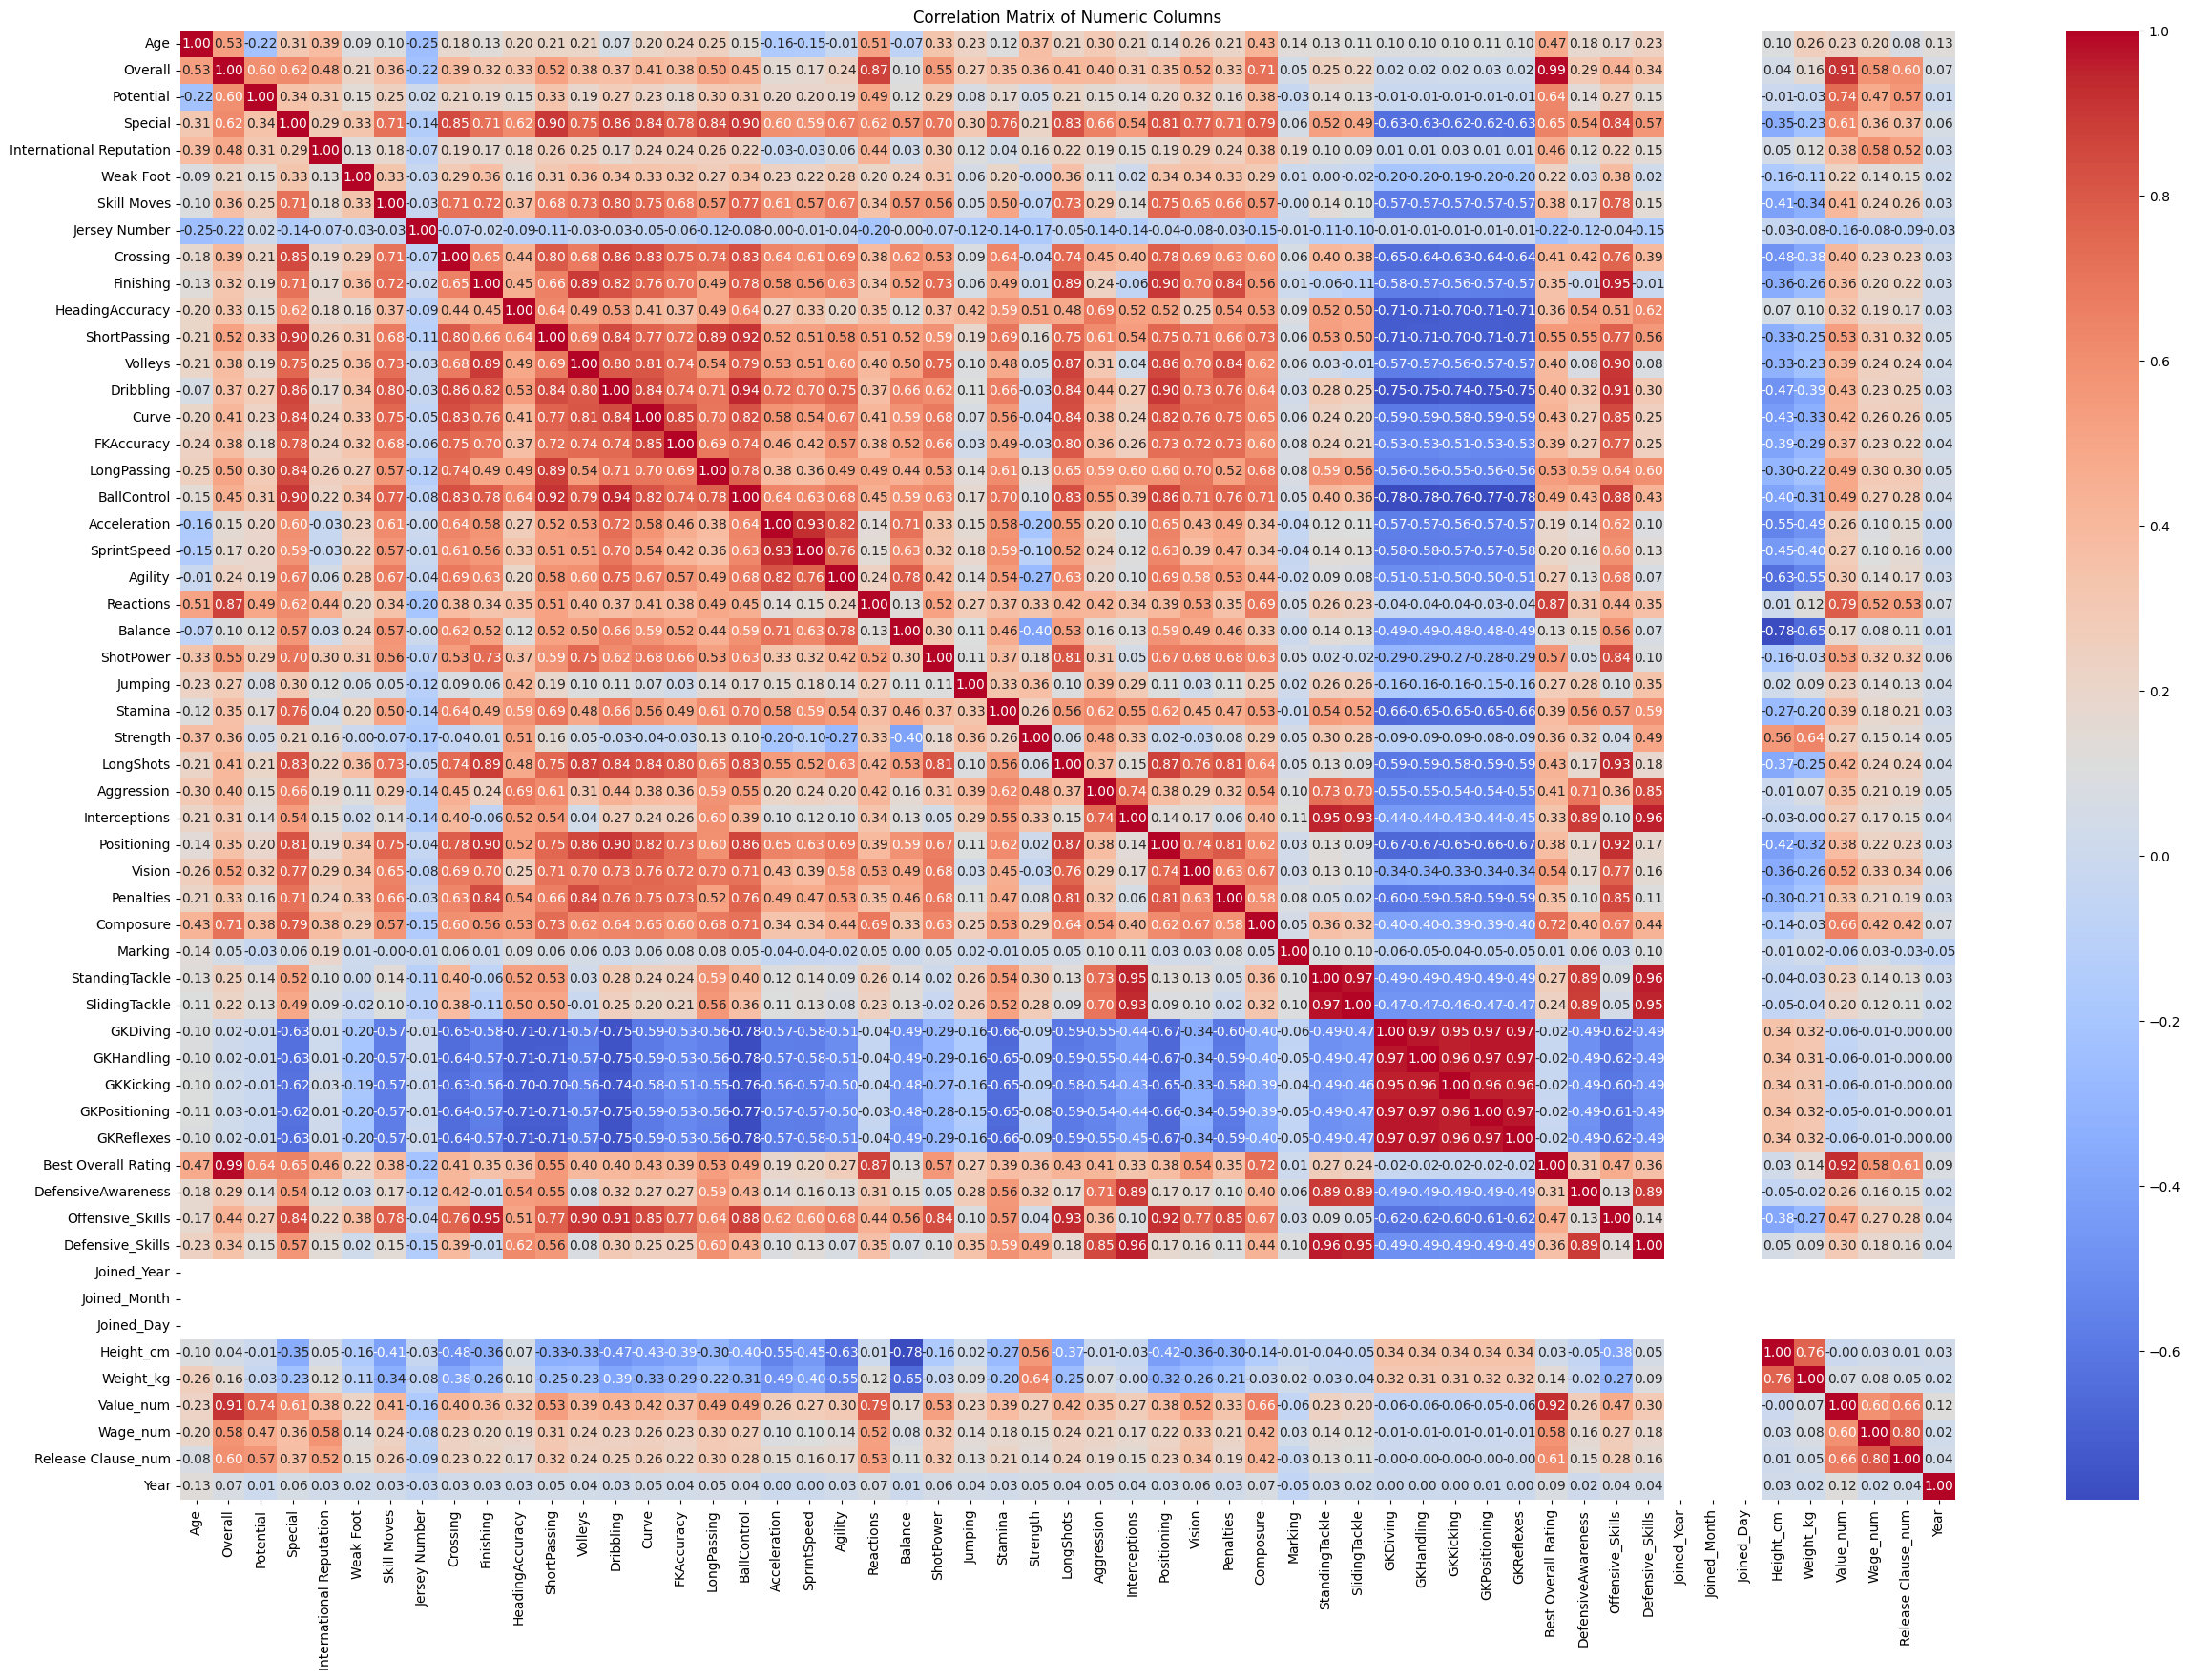

In [109]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [108]:
df_FIFA['Value_num']


0        18.493001
1        18.348110
2        17.611000
3        17.426428
4        18.497642
           ...    
50521    10.819778
50522    10.463103
50523    10.463103
50524    11.002100
50525    10.819778
Name: Value_num, Length: 50526, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)   # Entrena con los datos de entrenamiento
Y_hat = model.predict(X_test) # Predice con los datos de prueba

mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)

# Métricas de evaluación
mse = mean_squared_error(y_test, Y_hat)
mae = mean_absolute_error(y_test, Y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_hat)

# Mostrar resultados
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² (Variance score): {r2:.2f}")

Mean Squared Error (MSE): 0.2925920259107188
Mean Absolute Error (MAE): 0.39154503284529185
Root Mean Squared Error (RMSE): 0.5409177626134298
R² (Variance score): 0.83
